In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#By default, pandas might limit the number of displayed columns to improve readability, especially when dealing with DataFrames that have a large number of columns. However, in some cases, you may want to see all the columns, and that's when you can use this option to override the default behavior.

pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('soccer.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [4]:
df.shape

(660, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     660 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

In [6]:
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.810606,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,6.075315,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,42.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


#### substitution , mins , goals,xg,shots,on target these columns have skewness in the data distribution 

In [7]:
df.isnull().sum()

Country                    0
League                     0
Club                       0
Player Names               0
Matches_Played             0
Substitution               0
Mins                       0
Goals                      0
xG                         0
xG Per Avg Match           0
Shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
Year                       0
dtype: int64

#### as we can see data is very clean 

# Q1: What is the total number of goals scored in the entire dataset?

In [8]:
total_goal=df['Goals'].sum()

In [9]:
total_goal

7795

##### The total number of goals scored is : 7795

# Q2: Which player has scored the most goals as a substitution

In [10]:
df.columns

Index(['Country', 'League', 'Club', 'Player Names', 'Matches_Played',
       'Substitution ', 'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots',
       'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year'],
      dtype='object')

In [11]:
player_with_goals_as_substitiute=df[df['Substitution ']>0].sort_values(by='Goals',ascending=False).iloc[0]

In [32]:
player_with_goals_as_substitiute[['Player Names','Goals']]

Player Names    Lionel Messi
Goals                     37
Name: 12, dtype: object

### Lionel messi has scored the most goals as substitution : 37 Goals 

# Q3: Find the top 5 players with the most number of goals scored. Also find the total number of goals scored by them

In [12]:
df.groupby('Player Names')['Goals'].sum().sort_values(ascending=False).head()

Player Names
Lionel Messi          135
Cristiano Ronaldo     128
Robert Lewandowski    127
Ciro Immobile         107
Luis Suarez            95
Name: Goals, dtype: int64

# Q4: What are the top 10 countries with the most number of players in the dataset?

In [13]:
df['Country'].value_counts().head(10)

Spain           100
Italy           100
Germany         100
Brazil          100
England          80
France           60
USA              40
Portugal         40
 Netherlands     40
Name: Country, dtype: int64

# Q5:  Q1. Create a new dataframe after removing the ourliers for Mins Column in the dataset (conside the upper quantile to be 99 percentile and the lower quantile to be 1 percentile.). After that Find the difference in the number of rows?
Difference is df.shape(only rows) - df.shape(rows of filtered data only)

In [14]:
lower_percentile=df['Mins'].quantile(0.01)

In [15]:
upper_percentile=df['Mins'].quantile(0.99)

In [16]:
filter_data=df[(df['Mins']>=lower_percentile) & (df['Mins']<=upper_percentile)]

In [17]:
df.shape[0]-filter_data.shape[0]

14

In [18]:
filter_data

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,(UTR),Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,Eredivisie,(AJA),Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,Eredivisie,(PSV),Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
658,Netherlands,Eredivisie,None,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020


### The difference in number of rows are 14

# Q6: Which top 5 players have scored the maximum number of goals throughout all the years? Display them in descending order

In [19]:
top_players_goals = df.groupby('Player Names')['Goals'].sum().reset_index()

In [20]:
# Sort the players by the total goals in descending order and take the top 5
top_5_players = top_players_goals.sort_values(by='Goals', ascending=False).head(5)

In [21]:
top_5_players

,Player Names,Goals
259,Lionel Messi,135
93,Cristiano Ronaldo,128
368,Robert Lewandowski,127
86,Ciro Immobile,107
273,Luis Suarez,95


# Q7. Using Bar Plot show in which year has Cristiano Ronaldo scored the most number of goals?

In [22]:
ronaldo_data=df[df['Player Names']=='Cristiano Ronaldo']

In [23]:
ronaldo_data_year=ronaldo_data.groupby('Year')['Goals'].sum()

In [24]:
# Find the year with the most goals
year_with_most_goals = ronaldo_data_year.idxmax()

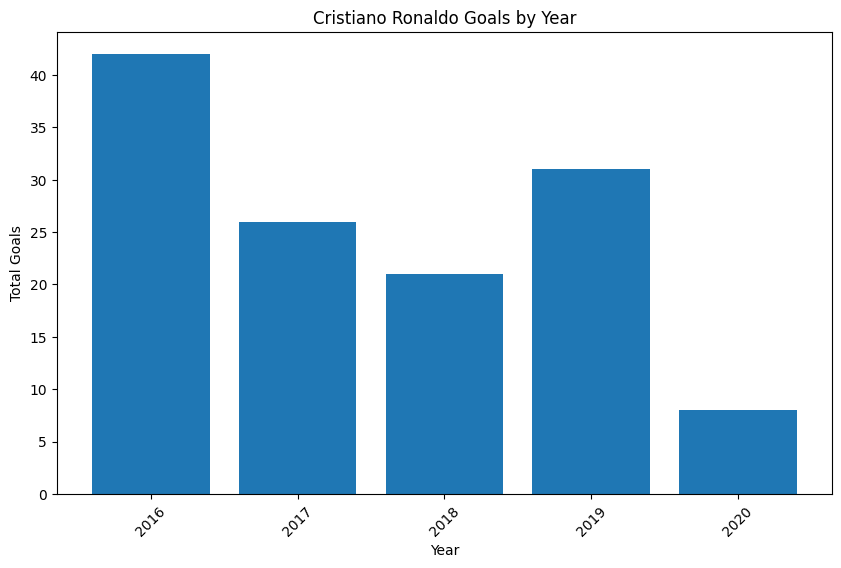

In [69]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(ronaldo_data_year.index, ronaldo_data_year.values)
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.title('Cristiano Ronaldo Goals by Year')
plt.xticks(rotation=45)
plt.show()


### In 2016 Cristiano ronaldo has scored most number of goals around 45 after that in 2019 he scored 30 goals 

# Q8. In the year 2019 who has more Goals between Ronaldo and Messi? 
- First print them normally 
- Display the comparison using a bar plot

In [25]:
# Filter the data to include only Cristiano Ronaldo and Lionel Messi's records in 2019
ronaldo_2019 = df[(df['Player Names'] == 'Cristiano Ronaldo') & (df['Year'] == 2019)]
messi_2019 = df[(df['Player Names'] == 'Lionel Messi') & (df['Year'] == 2019)]

In [26]:
ronaldo_2019['Goals'].values[0]

31

In [27]:
messi_2019['Goals'].values[0]

25

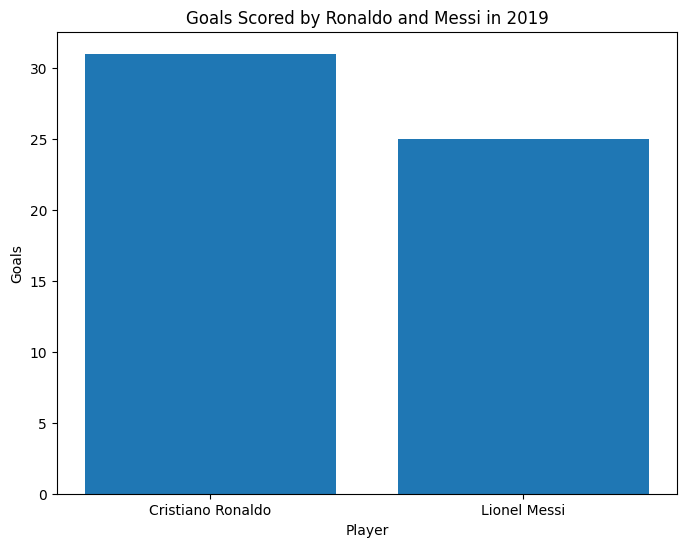

In [28]:
plt.figure(figsize=(8, 6))
plt.bar(['Cristiano Ronaldo', 'Lionel Messi'], [ronaldo_2019['Goals'].values[0], messi_2019['Goals'].values[0]])
plt.xlabel('Player')
plt.ylabel('Goals')
plt.title('Goals Scored by Ronaldo and Messi in 2019')
plt.show()

# Q9: Using Pie Chart show the amount of data various Countries are containing in this dataset(use the Country Columns Display the percentage of data as well in the pie chart

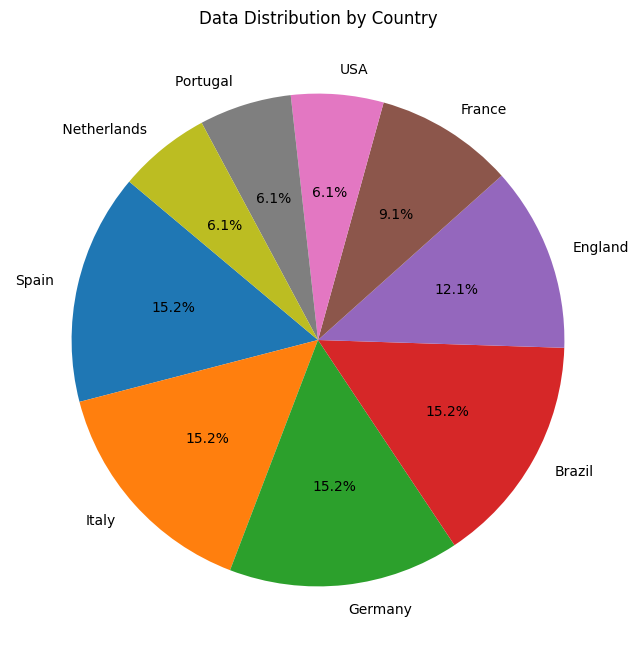

In [29]:
country_counts = df['Country'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Data Distribution by Country')
plt.show()

### Italy ,spain ,germany ,brazil these four country covered 60% of data mean 60% of goals, player are from these country 

# Q10: Display a Heatmap  to show the correlation between the columns in the dataset. The heatmap should have the value of the correlation printed within the boxes.

C:\Users\dell\AppData\Local\Temp\ipykernel_21072\1239737151.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


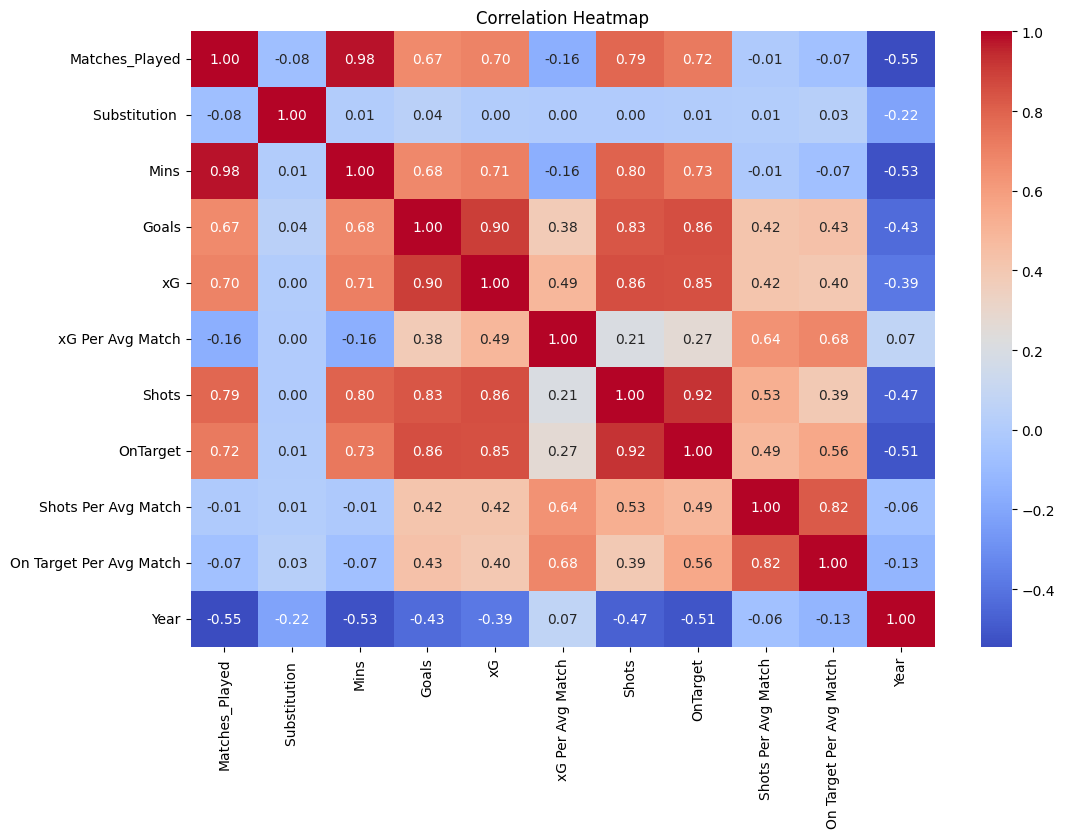

In [30]:

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### match played and min 
### shot and xg 
### goal and target  
#### show the positive correlation mean if one increase so other also increase so while make a model we can remove one one columns into trainng part of model 
### year and matchplayed ,min 
#### these are show negative correlation mean one increase so other decrease inversly proportional 

# Q11: Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020?

In [31]:
df_2020 = df[df['Year'] == 2020]

In [33]:
df_2020.groupby('Country')['OnTarget'].median().idxmax()

' Netherlands'

# Q12. Who has the best average  Goals per minute?
* Consider only those players who have played more than 30 games
* Then Find Goals per minute
* Find Mean of Goals per minute and sort the values

In [34]:

filtered_df = df[df['Matches_Played'] > 30]

In [35]:

filtered_df['Goals_Per_Minute'] = filtered_df['Goals'] / filtered_df['Mins']


C:\Users\dell\AppData\Local\Temp\ipykernel_21072\1447567545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Goals_Per_Minute'] = filtered_df['Goals'] / filtered_df['Mins']


In [81]:

mean_goals_per_minute = filtered_df['Goals_Per_Minute'].mean()

In [38]:

sorted_players = filtered_df.sort_values(by='Goals_Per_Minute', ascending=False) 

In [39]:
sorted_players

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Goals_Per_Minute
12,Spain,La Liga,(BAR),Lionel Messi,32,2,2910,37,26.65,0.87,179,76,5.84,2.48,2016,0.012715
408,Germany,Bundesliga,(BAY),Robert Lewandowski,31,0,2783,34,31.05,1.06,138,67,4.71,2.29,2019,0.012217
317,USA,MLS,(LAF),Carlos Vela,33,0,3128,36,25.35,0.77,167,75,5.07,2.28,2019,0.011509
54,Germany,Bundesliga,(ARS),Pierre-Emerick Aubameyang,31,1,2894,31,28.94,0.95,116,78,3.81,2.56,2016,0.010712
391,Italy,Serie A,(LAZ),Ciro Immobile,36,1,3371,36,26.61,0.75,142,71,4.00,2.00,2019,0.010679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Brazil,Campeonato Brasileiro SÃ©rie A,(CRU),Arthur Caike,34,0,2824,8,7.73,0.26,85,25,2.86,0.84,2017,0.002833
460,Brazil,Campeonato Brasileiro SÃ©rie A,None,Dudu,34,2,3313,9,9.42,0.27,95,38,2.72,1.09,2019,0.002717
91,Brazil,Campeonato Brasileiro SÃ©rie A,(BOT),Cicero Semedo,35,0,3322,9,9.79,0.28,62,27,1.77,0.77,2016,0.002709
291,Brazil,Campeonato Brasileiro SÃ©rie A,(GRE),Diego Souza,32,0,4177,11,11.43,0.26,51,21,1.16,0.48,2018,0.002633


# Q 13. Which Player has the least and most number of missed shots in the dataset?
* Missed Shots=Shots-On Target

In [40]:

df['Missed_Shots'] = df['Shots'] - df['OnTarget']

# Find the player with the least missed shots
player_with_least_missed_shots = df[df['Missed_Shots'] == df['Missed_Shots'].min()]['Player Names'].values[0]

# Find the player with the most missed shots
player_with_most_missed_shots = df[df['Missed_Shots'] == df['Missed_Shots'].max()]['Player Names'].values[0]


In [43]:
print('This is the player with least missed shots :',player_with_least_missed_shots)
print()
print ('This is the player with the most missed shot :',player_with_most_missed_shots)

This is the player with least missed shots : Esteban Burgos

This is the player with the most missed shot : Cristiano Ronaldo


# Q14: How many countries have had players who played more than 35 matches? Create a bar plot to display the count for each country.

In [44]:

filtered_df = df[df['Matches_Played'] > 35]

In [45]:

country_counts = filtered_df['Country'].value_counts()

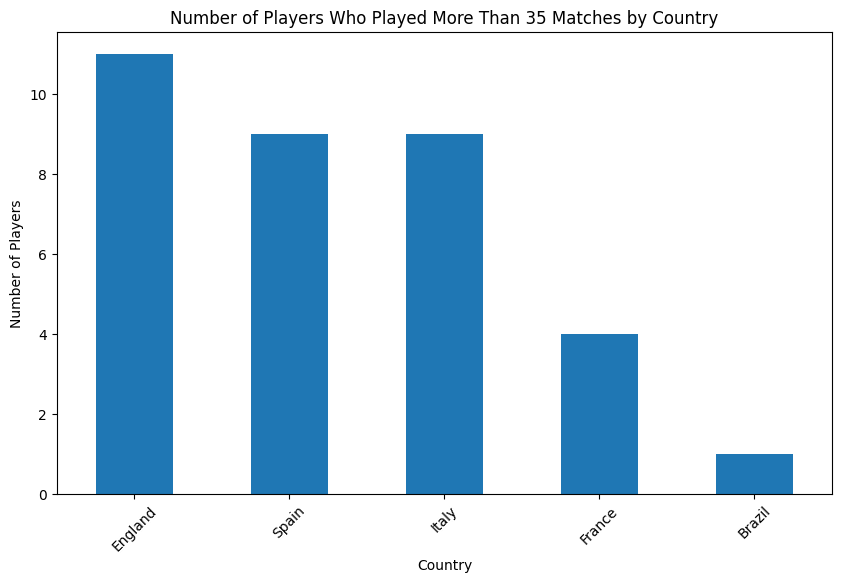

In [46]:
# Create a bar plot to display the count for each country
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.title('Number of Players Who Played More Than 35 Matches by Country')
plt.xticks(rotation=45)
plt.show()

# Q15: Draw a Line Chart to show the comparison of the top 5 highest scoring players in the dataset throughout the years(2016-2020)

In [51]:
player_goals_by_year = df.groupby(['Player Names', 'Year'])['Goals'].sum().reset_index()


top_players = player_goals_by_year.groupby('Player Names')['Goals'].sum().nlargest(5).index.tolist()


top_players_data = player_goals_by_year[player_goals_by_year['Player Names'].isin(top_players)]



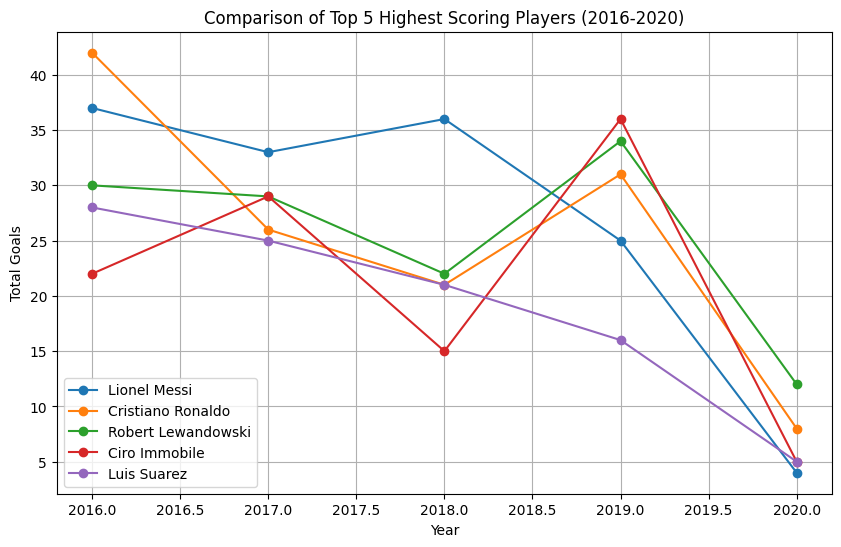

In [52]:
plt.figure(figsize=(10, 6))
for player in top_players:
    player_data = top_players_data[top_players_data['Player Names'] == player]
    plt.plot(player_data['Year'], player_data['Goals'], marker='o', label=player)

plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.title('Comparison of Top 5 Highest Scoring Players (2016-2020)')
plt.legend()
plt.grid(True)
plt.show()

### As we do comparison of messi and ronaldo goals since 2016 to 2020 we can see in graph in starting ronaldo was little high score than messi but after ronaldo score drop drastically and messi maintain their consistency and then 2019 ronaldo improve himself and score higher than messi and one more ciro and robert that year score higher than messi and ronaldo and now 2020 robert was the highest scorer 